In [29]:
from asammdf import MDF
%matplotlib inline

In [30]:
mdf = MDF("A1_f1_c2.mf4")

In [31]:
mdf.channels_db

{'sawtooth': [(0, 3)], 'sine': [(0, 1)], 'square': [(0, 2)], 't': [(0, 0)]}

In [32]:
sine = mdf.select(["sine",])[0]

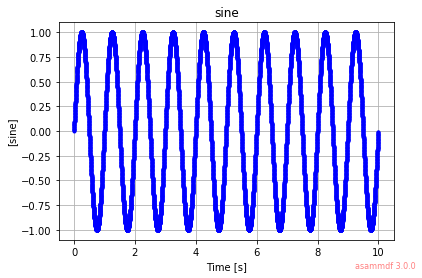

In [39]:
sine.plot()